In **bootstrap**, we resample from the data which is already sampled from the population.

We use the resampled data to calculate OLS estimates, associated standard errors, confidence intervals etc.
- Here, we use bootstrapped datasets not only to estimate what the population parameter could be but also we can calculate how much the variability associated is with respect to these `multiple bootstrapped datasets`, as opposed to the `lm()` way of doing it with one dataset.
- The variability in the OLS coefficient estimates can now be actually visualized based on which Bootstrap dataset we used to calculate them.

## When do we need to Bootstrap?
Bootstrap is need in situations when:
1. Data collected is small w.r.t. sample size but still you assume that they are representative of the entire population
2. (Core necessity) assumptions we made in the population model might have been violated.
For example: We might assume that the random errors are independent which might not be true.
3. Need sampling distributions for much more complex estimation procedures, where no closed form expressions exist.

# Bootstrap Algorithm for Linear Regression

From a dataset with `n` samples, we draw `n` samples with replcament.

### **Example Using heteroskedastic Data** (Heteroskedasticity means non-constant variance)
- Let's consider a dataset drawn from the population model Y = X + E,

where,
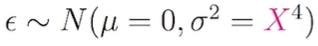

Here, the variance depends on the predictor value (Bigger the predictor value bigger the variance and vice versa).

`Therefore, the assumptions for MLRM to draw statistical inferences and for performing hyprthesis tests for the corfficient estimates are` **violated** (constant variance is no more valid).

So, in this case we will use bootstrap approach to investigate the effect on the standard error of the coefficients reported by the lm().

In [ ]:
install.packages(c("dplyr", "boot", "ggplot2"))
library(dplyr)
library(boot) # for bootstrapping
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Generating sample data
n = 100 # dataset size
X = rnorm(n) # normally distributed around 0 and 1
Y = X + rnorm(n, mean = 0, sd = X^2)
df = data.frame(X,Y)
head(df)

,X,Y
,<dbl>,<dbl>
1,0.6395863,0.4767234
2,0.7282872,0.1960054
3,2.1494027,3.8573238
4,0.5159282,1.0643335
5,0.9954447,2.4294810
6,-1.6263626,-0.3523766


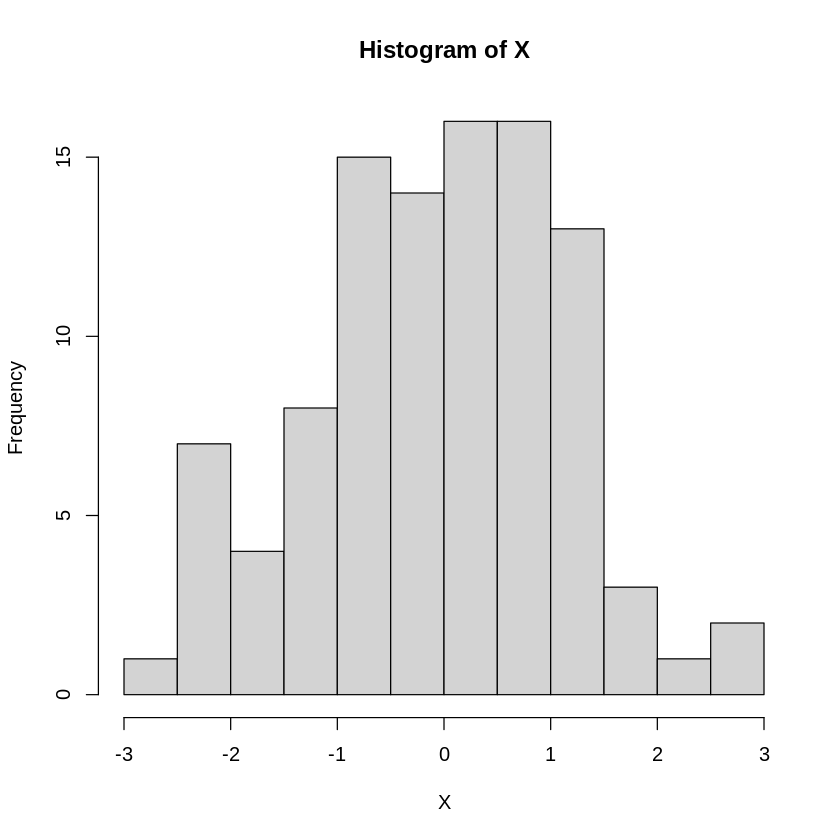

In [ ]:
hist(X)

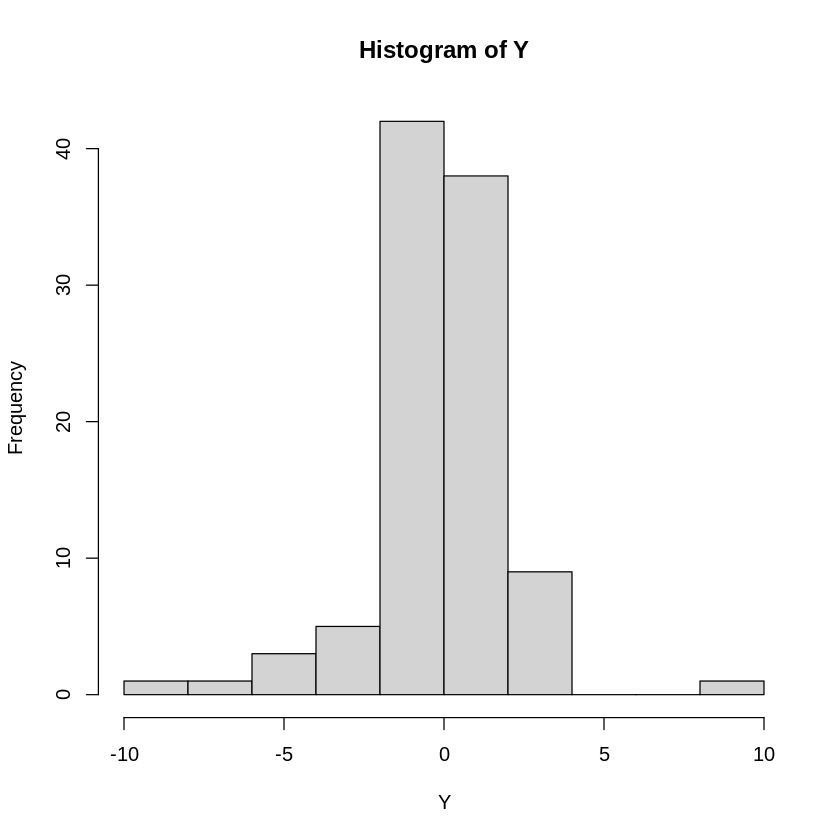

In [ ]:
hist(Y)

In [ ]:
# Building a linear model for Y as a function of X
model = lm(data = df, Y ~ X)
summary(model)


Call:
lm(formula = Y ~ X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6467 -0.2327  0.1469  0.4754 10.8779 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.1609     0.1910  -0.842    0.402    
X             0.7814     0.1658   4.713 8.07e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.908 on 98 degrees of freedom
Multiple R-squared:  0.1848,	Adjusted R-squared:  0.1765 
F-statistic: 22.21 on 1 and 98 DF,  p-value: 8.074e-06


In [ ]:
coef(model)

(Intercept)           X 
 -0.1609034   0.7814352

As we see that out standard error is quiet high so we cannot trust the intercept estimate (B0hat) whihc is also evident by larger p-value.

# **Bootstrap Approach**


In [ ]:
# Function to perform linear regression and return
# coefficient estimates
funcLinReg = function(data, ind) {      # only for certain indices/row
  model = lm(data = data[ind,] , Y ~ X)
  return(coef(model))
  # coefs = summary(model)$coefficients
  # return(coefs[, 'std. Error'])
}

In [ ]:
# Function to perform bootstrapping
model.boot = boot(df, funcLinReg, 50000)
# whatever quantity we are returning here gets stored in variable 't'
model.boot$t

0.330744042,0.2312682
-0.047184505,0.7215820
0.221252734,0.5442424
-0.044412959,0.7112008
-0.261898345,0.4037902
-0.066084937,1.0873270
0.044540525,0.4444331
-0.299649631,0.9608607
-0.284267034,1.0142572
-0.042665355,0.5513729
-0.379000153,1.0066098


Here, we can see that we need a lot of computational power for bootstrapping, but it will reveal a lot of underlying information about the dataset.

The bootstrapped model will have all the results just like the lm(), but here we are going to have 50,000 such estimates.



In [ ]:
model.boot$t

0.330744042,0.2312682
-0.047184505,0.7215820
0.221252734,0.5442424
-0.044412959,0.7112008
-0.261898345,0.4037902
-0.066084937,1.0873270
0.044540525,0.4444331
-0.299649631,0.9608607
-0.284267034,1.0142572
-0.042665355,0.5513729
-0.379000153,1.0066098


Here, we see the coefficient estimates of all the Bootstrapped models each comprising of 100 samples.

Let's get the avaerage `Bootstrapped` estimate of `B0hat` and `B1hat`

In [ ]:
# Bootstrapped estimate
colMeans(model.boot$t)

[1] -0.1581630  0.7870578

In [ ]:
# from our previous lm()
coef(model)

(Intercept)           X 
 -0.1609034   0.7814352

Here, we can see that it is similar to our previous lm() where we had only one dataset.

Therefore, the bootstrap model, under the assumption that the dataset we have is represenattive of the original population generally will do better than using just one dataset.

Also, Bootstrap performs better than the standard lm() and a single dataset when we have non-constant variance and other assumptions violated.

## Bootstrap Application:
- Bootstrap can be used to measure variability in model estimates for modeling strategies such as ridge and lsso regression.
- Bootstrap can be used to estimate test error in a prediction setting instead of corss validation.

## Limitations:
- The number of bootstrap samples should be large to dilute the effect of resampling in the estimated distribution, which is dictated by available computational power. (Effect of randomness should be diluted)
- The dataset used for drawing bootstrap samples should be representative of the original population model.